## 讀取 Data，只取第一段5秒 並且 scaling

In [72]:
import os
from pathlib import Path
from utils import data_loader_utils
import itertools 

In [73]:
import pickle

# load X_raw_data.pkl, y_raw_data.pkl
with open("X_raw_data.pkl", "rb") as file:
    X_raw_data = pickle.load(file)

with open("y_raw_data.pkl", "rb") as file:
    y_raw_data = pickle.load(file)

In [74]:
len(X_raw_data), len(y_raw_data)

(1702, 1702)

[134, 134, 134, 132, 134, 134, 134, 134, 131, 134, 134, 134, 134, 134, 134, 133, 132, 133, 132, 132, 136, 135, 134, 133, 133, 134, 135, 134, 134, 134]


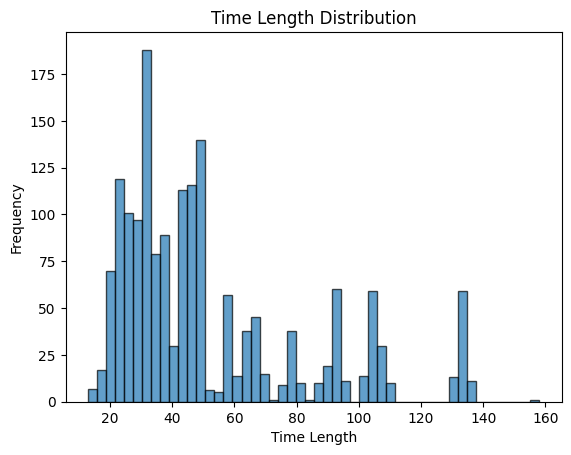

In [75]:
time_lengths = [x.shape[0]//2000 for x in X_raw_data]
print(time_lengths[:30])
import matplotlib.pyplot as plt

# 繪製直方圖
plt.hist(time_lengths, bins=50, edgecolor='black', alpha=0.7)
plt.title('Time Length Distribution')
plt.xlabel('Time Length')
plt.ylabel('Frequency')
plt.show()

In [76]:
num_bad, num_good = [1 if "good" in i else 0 for i in y_raw_data].count(0), [1 if "good" in i else 0 for i in y_raw_data].count(1)
num_bad, num_good

(70, 1632)

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(vibration_data, color='b'):
    freq = 2000
    samples_s = len(vibration_data[:, 0]) / freq
    samples = np.linspace(0, samples_s, len(vibration_data[:, 0]))

    # plotting
    plt.figure(figsize=(20, 2))
    plt.plot(samples, vibration_data[:, 0], color)
    plt.ylabel('X-axis Vibration Data')
    plt.xlabel('Time [sec]')
    plt.locator_params(axis='y', nbins=10)
    plt.grid()
    plt.show()
    plt.figure(figsize=(20, 2))
    plt.plot(samples, vibration_data[:, 1], color)
    plt.ylabel('Y-axis Vibration Data')
    plt.xlabel('Time [sec]')
    plt.locator_params(axis='y', nbins=10)
    plt.grid()
    plt.show()
    plt.figure(figsize=(20, 2))
    plt.plot(samples, vibration_data[:, 2], color)
    plt.ylabel('Z-axis Vibration Data')
    plt.xlabel('Time [sec]')
    plt.locator_params(axis='y', nbins=10)
    plt.grid()
    plt.show()

In [78]:
good_indices = [i for i, path in enumerate(y_raw_data) if "good" in path]
bad_indices = [i for i, path in enumerate(y_raw_data) if "bad" in path]

good
index: 1356
time length: 48


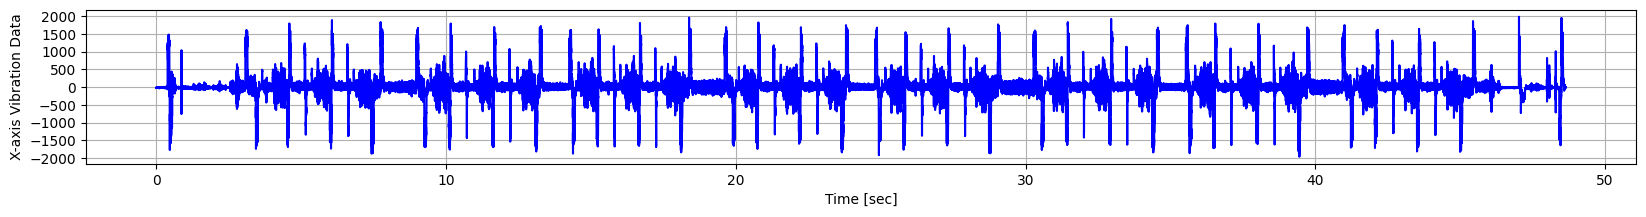

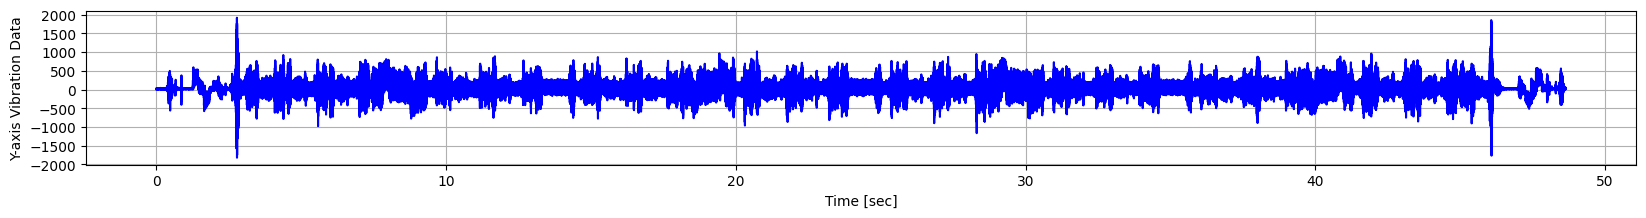

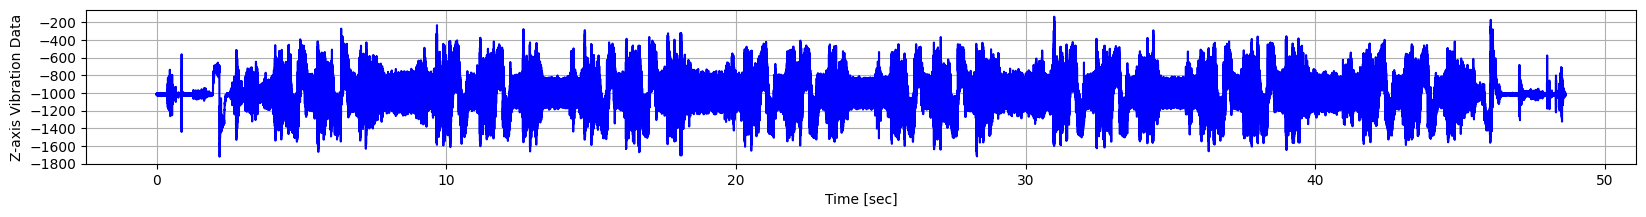

In [79]:
import random
good_or_bad = "good"
# good_or_bad = "bad"
print(good_or_bad)
if good_or_bad == "good":
    random_index = random.choice(good_indices)
    color = 'b'
else:
    random_index = random.choice(bad_indices)
    color = 'r'
print("index:", random_index)
print("time length:", time_lengths[random_index])
plot_data(X_raw_data[random_index],color)

bad
index: 1389
time length: 42


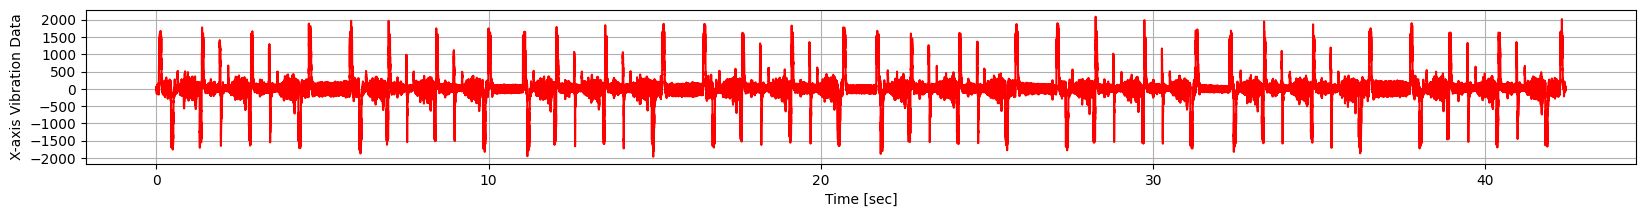

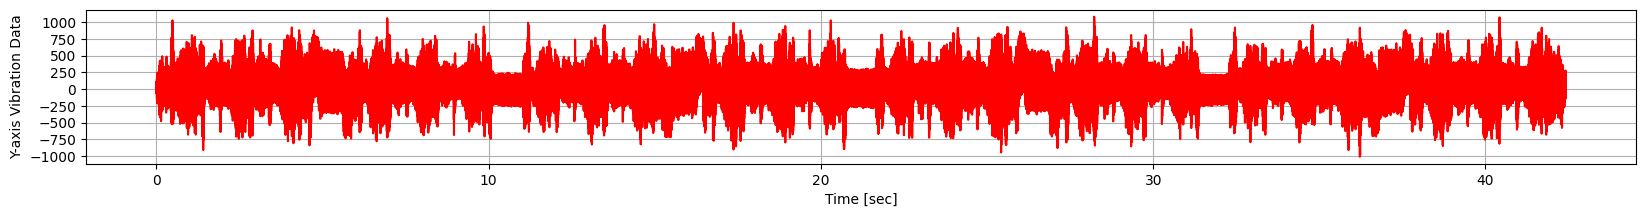

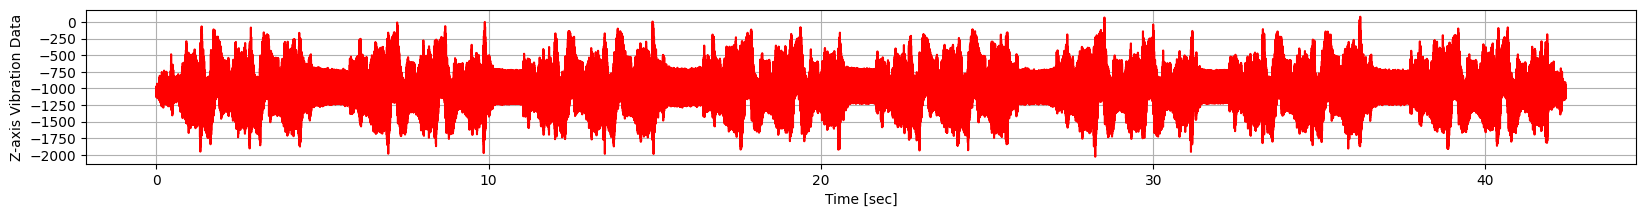

In [80]:
import random
# good_or_bad = "good"
good_or_bad = "bad"
print(good_or_bad)
if good_or_bad == "good":
    random_index = random.choice(good_indices)
    color = 'b'
else:
    random_index = random.choice(bad_indices)
    color = 'r'
print("index:", random_index)
print("time length:", time_lengths[random_index])
plot_data(X_raw_data[random_index],color)

In [81]:
for arr in X_raw_data:
    arr[:, 2] += 1000

In [82]:
X_raw_data[3]

array([[-33.,  15.,  -5.],
       [-37.,   7., -11.],
       [-35.,  21., -15.],
       ...,
       [ -9.,  19., -75.],
       [-31.,  29., -93.],
       [-19.,  33., -87.]])

good
index: 1258
time length: 46


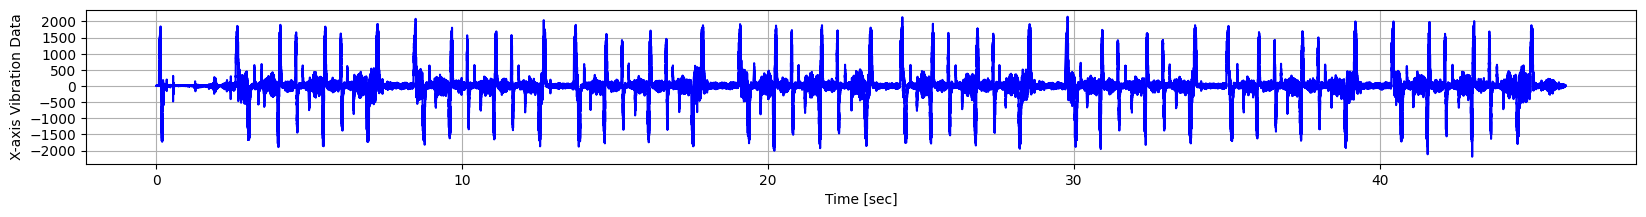

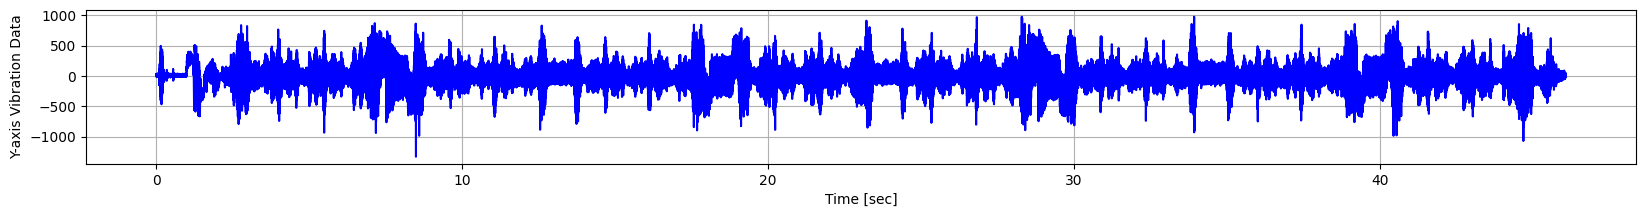

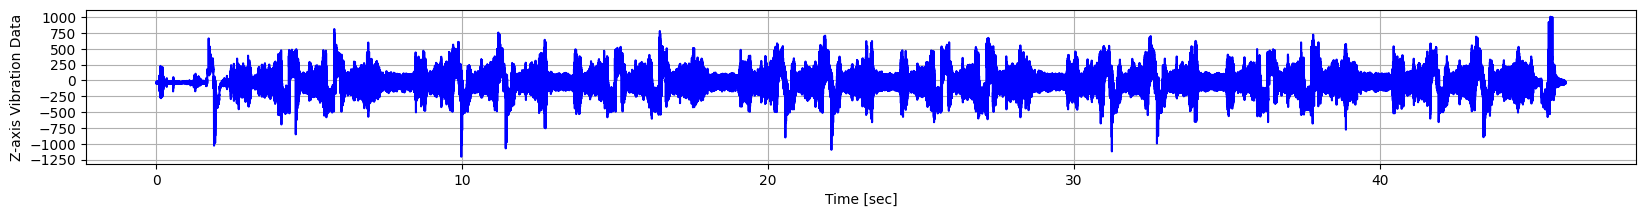

In [83]:
import random
good_or_bad = "good"
# good_or_bad = "bad"
print(good_or_bad)
if good_or_bad == "good":
    random_index = random.choice(good_indices)
    color = 'b'
else:
    random_index = random.choice(bad_indices)
    color = 'r'
print("index:", random_index)
print("time length:", time_lengths[random_index])
plot_data(X_raw_data[random_index],color)

bad
index: 483
time length: 33


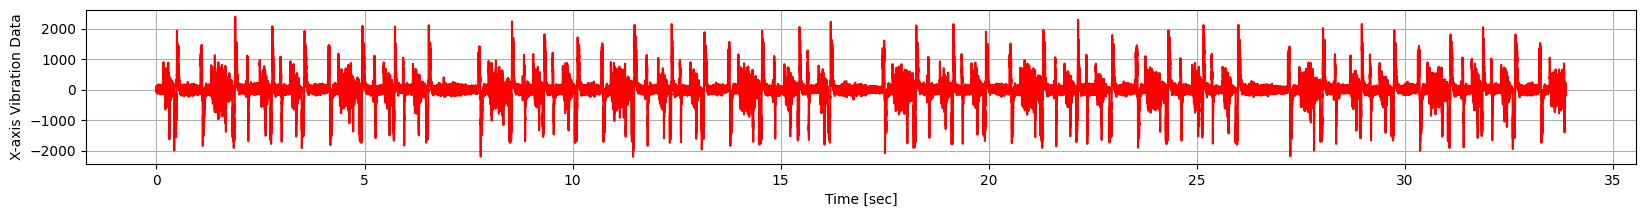

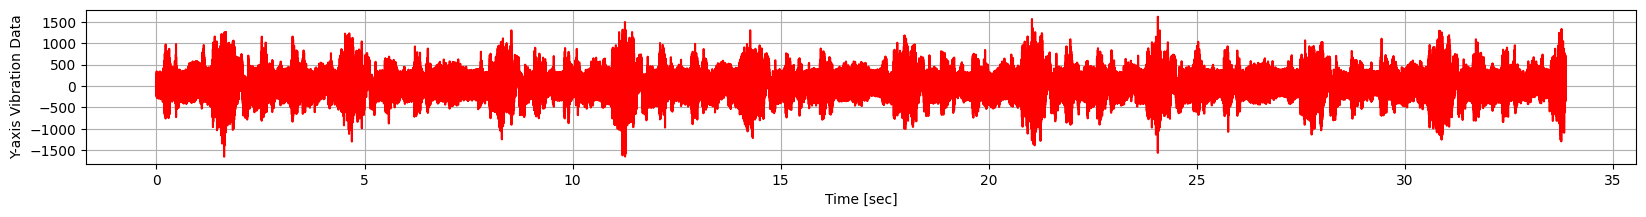

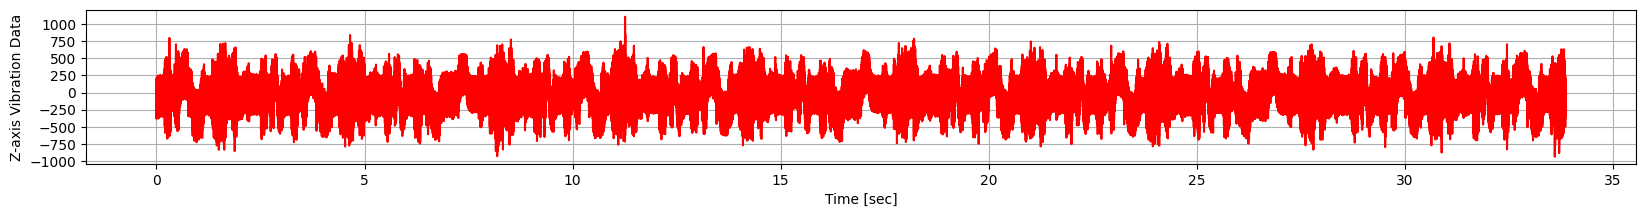

In [84]:
import random
# good_or_bad = "good"
good_or_bad = "bad"
print(good_or_bad)
if good_or_bad == "good":
    random_index = random.choice(good_indices)
    color = 'b'
else:
    random_index = random.choice(bad_indices)
    color = 'r'
print("index:", random_index)
print("time length:", time_lengths[random_index])
plot_data(X_raw_data[random_index],color)

In [85]:
import numpy as np

def process_time_series_with_overlap(data, sample_rate=2000, skip_seconds=5, segment_seconds=5, overlap_seconds=2):
    """
    處理 time series data，去除開頭資料並切分成固定長度、具有 overlap 的片段。
    
    :param data: numpy array, shape = (length, 3)
    :param sample_rate: 採樣率, 預設 2000 Hz
    :param skip_seconds: 開頭跳過的秒數, 預設 5 秒
    :param segment_seconds: 每段切分的秒數, 預設 5 秒
    :param overlap_seconds: 每段之間的重疊秒數, 預設 2 秒
    :return: 切分後的資料列表，每個元素為 numpy array
    """
    # 計算需要跳過的資料行數
    skip_rows = skip_seconds * sample_rate
    # 計算每段的行數
    segment_rows = segment_seconds * sample_rate
    # 計算每次移動的步數 (segment_rows - overlap_rows)
    overlap_rows = overlap_seconds * sample_rate
    step_rows = segment_rows - overlap_rows

    # 去掉開頭的資料
    data = data[skip_rows:]
    
    # 切分資料，加入 overlap
    segments = [data[i:i + segment_rows] for i in range(0, len(data) - segment_rows + 1, step_rows)]
    
    return segments[0:1]
    # return segments

# 示例資料
_data = X_raw_data[300]
_result = process_time_series_with_overlap(_data)

print(len(_result))
print(_result[0].shape)

1
(10000, 3)


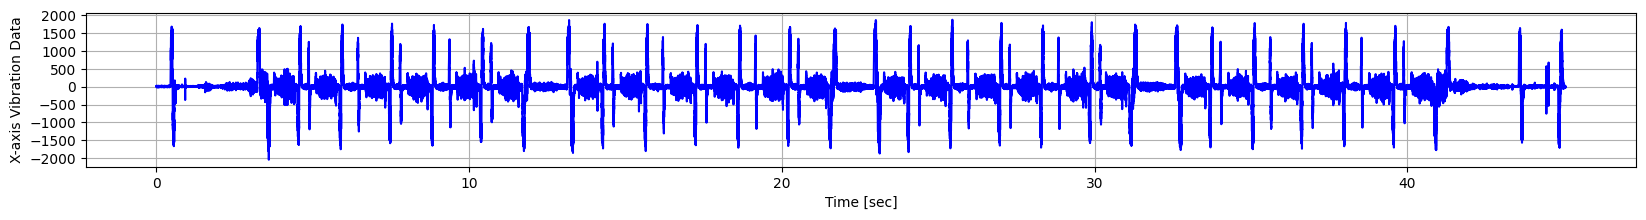

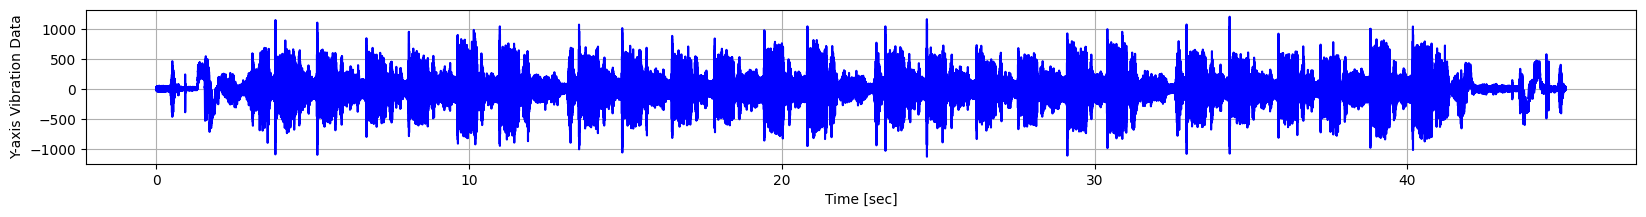

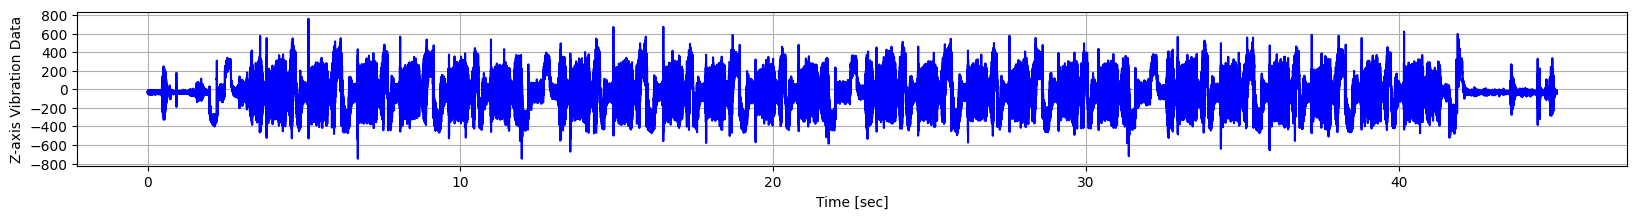

In [86]:
plot_data(_data)

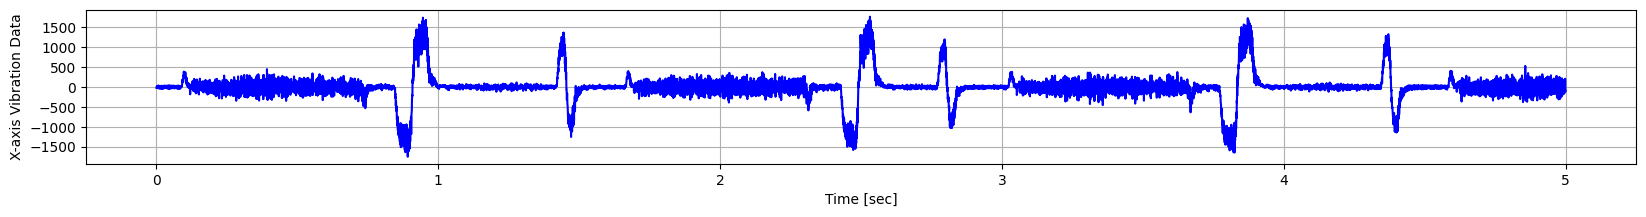

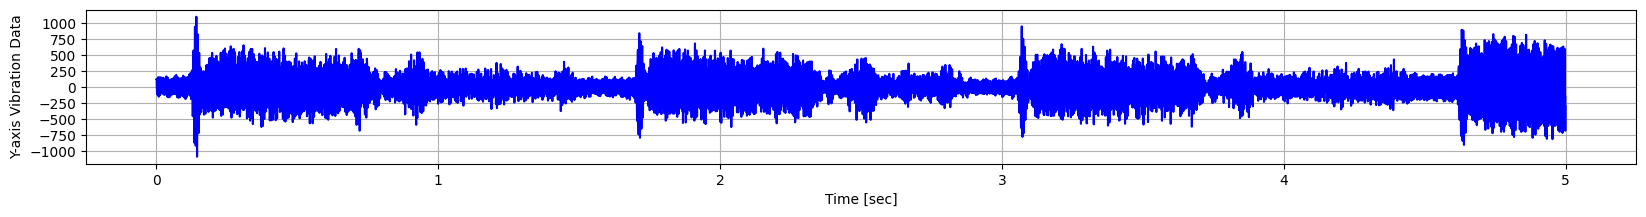

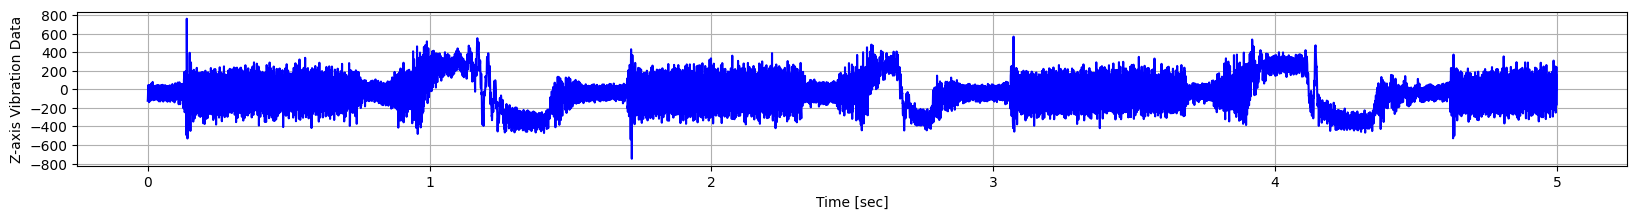

In [87]:
plot_data(_result[0])

In [88]:
X_data = []
y_data = []
SAMPLE_RATE = 2000 # Hz
SKIP_SECONDS = 5 # sec
TIME_LENGTH = 5 # sec
OVERLAP_SECONDS = 2 # sec
# TIME_LENGTH = 10 # sec
# 
for i in range(len(X_raw_data)):
    X_data.extend(process_time_series_with_overlap(X_raw_data[i], SAMPLE_RATE, SKIP_SECONDS, TIME_LENGTH, OVERLAP_SECONDS))
    if 'good' in y_raw_data[i]:
        y_data.extend([0] * len(process_time_series_with_overlap(X_raw_data[i], SAMPLE_RATE, SKIP_SECONDS, TIME_LENGTH, OVERLAP_SECONDS)))
    else:
        y_data.extend([1] * len(process_time_series_with_overlap(X_raw_data[i], SAMPLE_RATE, SKIP_SECONDS, TIME_LENGTH, OVERLAP_SECONDS)))

# for p in h5s_paths[20:35]:
#     with h5py.File(p, 'r') as f:
#         vibration_data.append(f['vibration_data'][:])
#         # print(f['vibration_data'][2000 * 5: (f['vibration_data'].shape[0] // 2000)// 5 * 5 * 2000].shape[0])
# # vibration_data

In [89]:
for i in X_data[:8]:
    print(i.shape)

(10000, 3)
(10000, 3)
(10000, 3)
(10000, 3)
(10000, 3)
(10000, 3)
(10000, 3)
(10000, 3)


In [90]:
len(X_data), len(y_data)

(1702, 1702)

In [91]:
y_data.count(0), y_data.count(1), y_data.count(0)/(y_data.count(0)+y_data.count(1))

(1632, 70, 0.9588719153936546)

In [92]:
del X_raw_data

In [93]:
X_data1 = np.array(X_data)

In [94]:
X_data1[:2], X_data1.shape

(array([[[  31.,  -56.,  -38.],
         [ -48.,  -60.,  144.],
         [ -42.,   35.,  159.],
         ...,
         [-823.,  216., -194.],
         [-747.,  -68.,  155.],
         [-958.,  -58.,  267.]],
 
        [[ -19.,  -70.,  124.],
         [ -48.,   58.,  147.],
         [  13.,   -3.,   17.],
         ...,
         [ -74.,   -3.,  -34.],
         [   0.,  173., -179.],
         [  23.,   17., -362.]]]),
 (1702, 10000, 3))

In [95]:
X_data_abs = np.abs(X_data1)
X_data_abs[:4]

array([[[3.100e+01, 5.600e+01, 3.800e+01],
        [4.800e+01, 6.000e+01, 1.440e+02],
        [4.200e+01, 3.500e+01, 1.590e+02],
        ...,
        [8.230e+02, 2.160e+02, 1.940e+02],
        [7.470e+02, 6.800e+01, 1.550e+02],
        [9.580e+02, 5.800e+01, 2.670e+02]],

       [[1.900e+01, 7.000e+01, 1.240e+02],
        [4.800e+01, 5.800e+01, 1.470e+02],
        [1.300e+01, 3.000e+00, 1.700e+01],
        ...,
        [7.400e+01, 3.000e+00, 3.400e+01],
        [0.000e+00, 1.730e+02, 1.790e+02],
        [2.300e+01, 1.700e+01, 3.620e+02]],

       [[5.000e+01, 7.800e+01, 5.600e+01],
        [2.100e+01, 1.090e+02, 8.100e+01],
        [8.300e+01, 8.000e+01, 1.450e+02],
        ...,
        [3.300e+01, 0.000e+00, 1.920e+02],
        [1.000e+00, 3.000e+00, 3.780e+02],
        [5.600e+01, 9.000e+00, 5.010e+02]],

       [[8.300e+01, 3.100e+01, 9.300e+01],
        [8.500e+01, 2.300e+01, 1.900e+02],
        [6.400e+01, 1.500e+02, 1.220e+02],
        ...,
        [1.905e+03, 2.510e+02, 3.600e+0

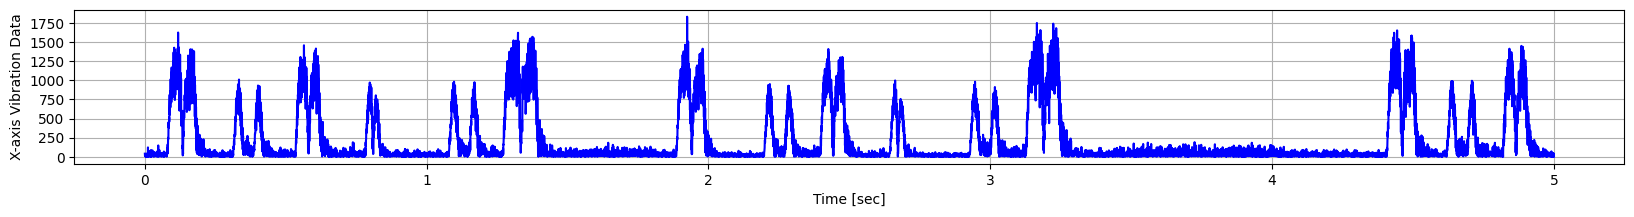

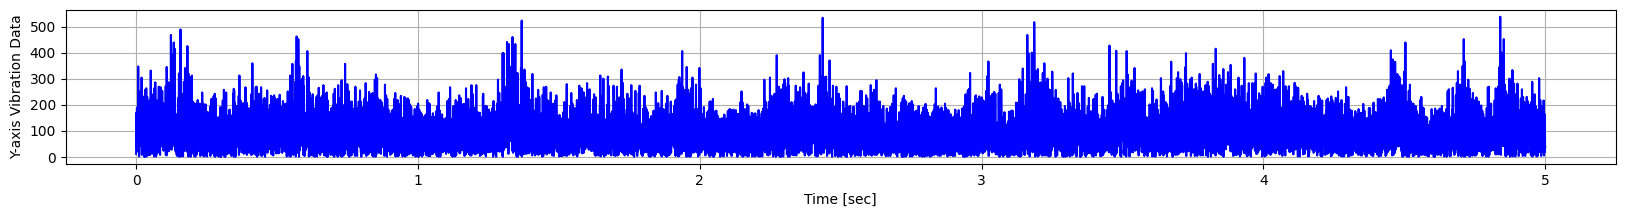

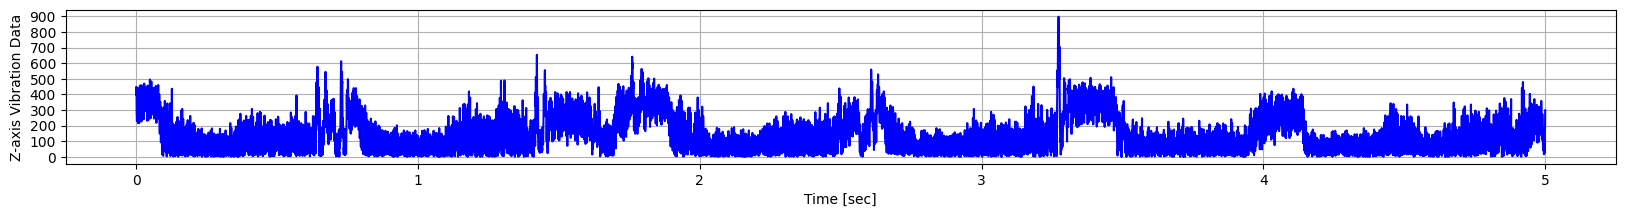

In [96]:
plot_data(X_data_abs[155])

In [97]:
X_data_abs[:,:,0].max()

5098.0

In [98]:
x_abs_max, y_abs_max, z_abs_max = X_data_abs[:,:,0].max(), X_data_abs[:,:,1].max(), X_data_abs[:,:,2].max()
print(x_abs_max, y_abs_max, z_abs_max)

5098.0 5930.0 3851.0


## scaling

In [99]:
for i,m_i in enumerate([x_abs_max, y_abs_max, z_abs_max]):
    X_data1[:,:,i] = X_data1[:,:,i]/m_i

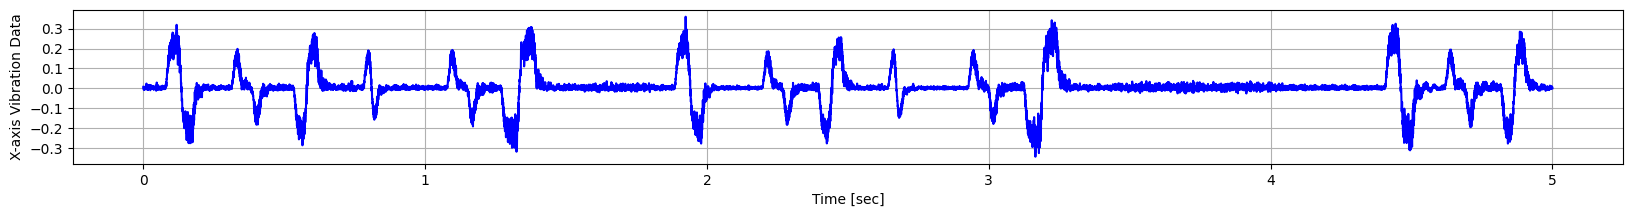

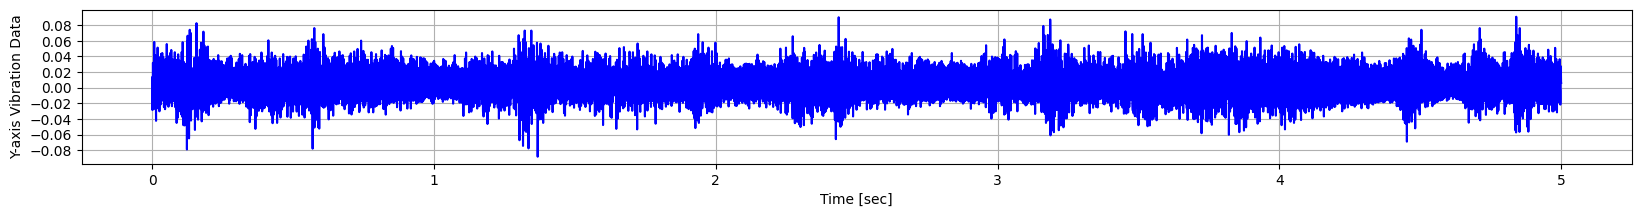

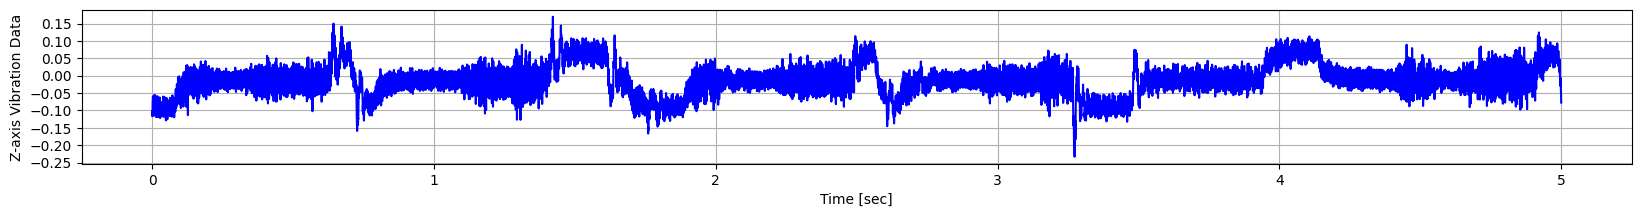

In [100]:
plot_data(X_data1[155])

In [101]:
X_data1.shape[0], len(y_data)

(1702, 1702)

In [102]:
good_indices = [index for index, value in enumerate(y_data) if value == 0]
bad_indices = [index for index, value in enumerate(y_data) if value == 1]

In [103]:
len(good_indices), len(bad_indices)

(1632, 70)

In [104]:
good_indices[:6], bad_indices[:6]

([0, 1, 2, 3, 4, 5], [55, 122, 123, 175, 176, 177])

good
index: 863


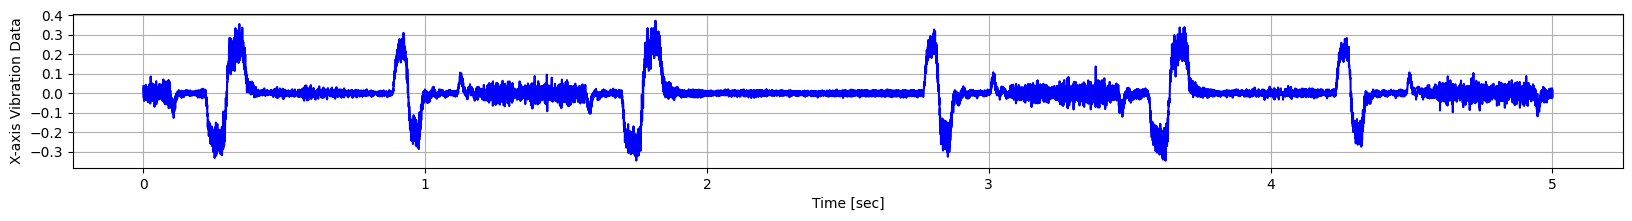

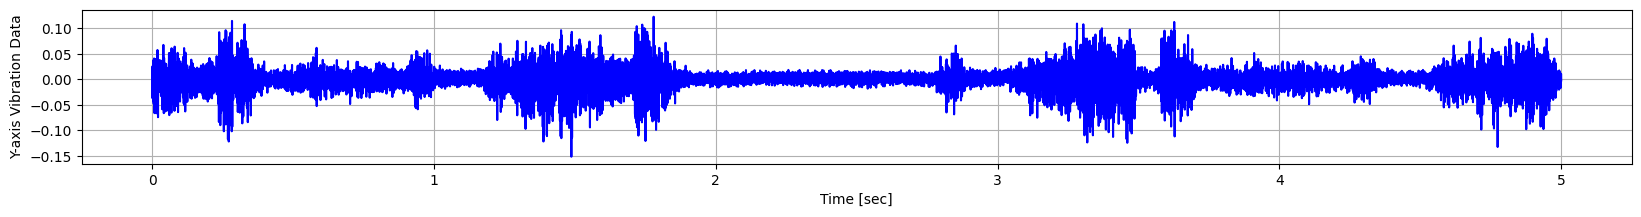

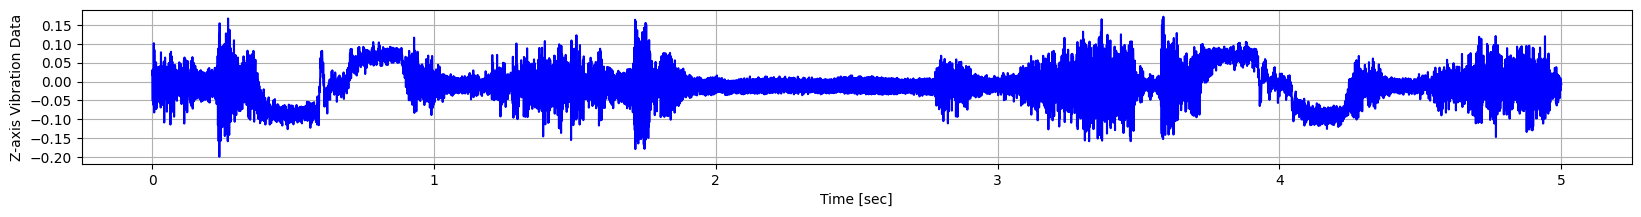

In [105]:
import random
good_or_bad = "good"
# good_or_bad = "bad"
print(good_or_bad)
if good_or_bad == "good":
    random_index = random.choice(good_indices)
    color = 'b'
else:
    random_index = random.choice(bad_indices)
    color = 'r'
print("index:", random_index)
plot_data(X_data1[random_index],color)

bad
index: 870


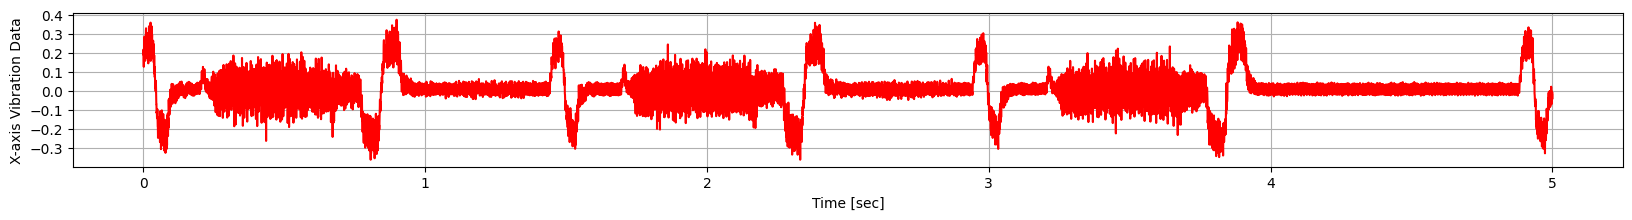

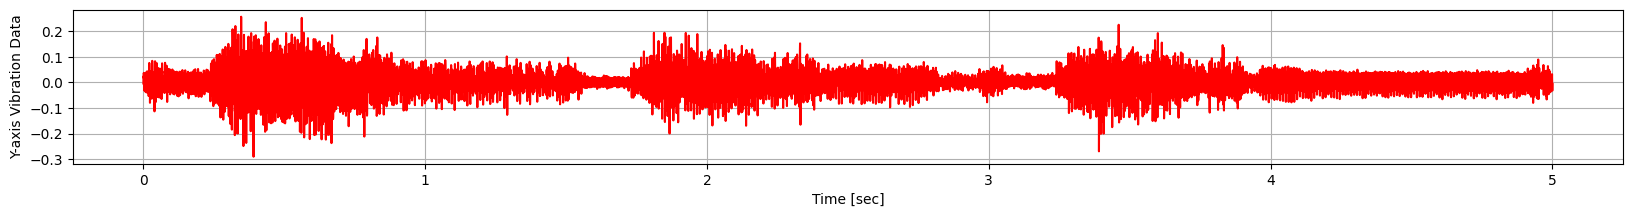

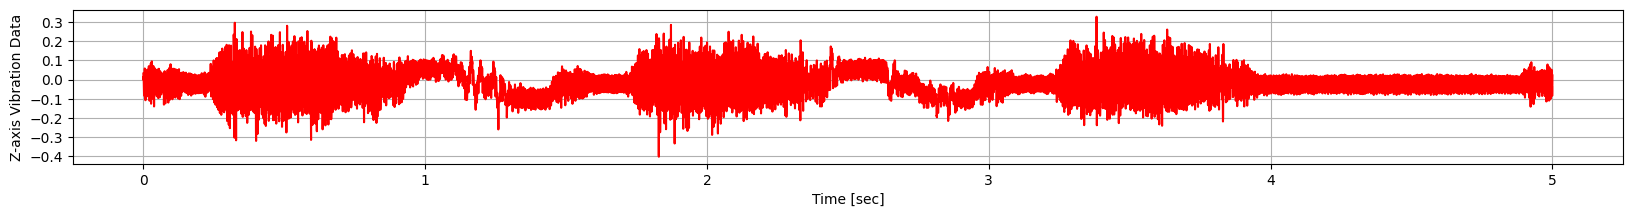

In [106]:
import random
# good_or_bad = "good"
good_or_bad = "bad"
print(good_or_bad)
if good_or_bad == "good":
    random_index = random.choice(good_indices)
    color = 'b'
else:
    random_index = random.choice(bad_indices)
    color = 'r'
print("index:", random_index)
plot_data(X_data1[random_index],color)

good
index: 1425


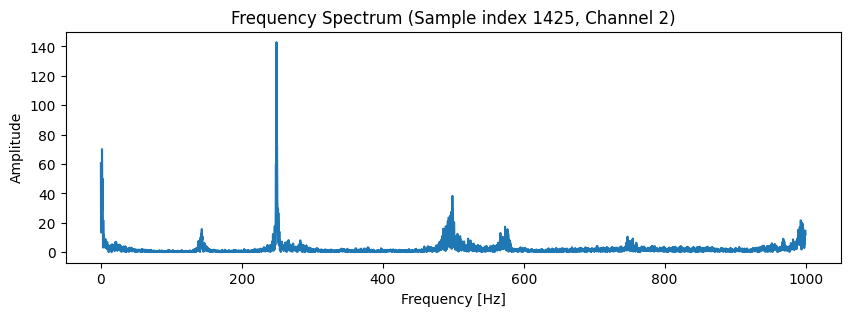

[0.  0.2 0.4 0.6 0.8] (5000,)


In [107]:
import numpy as np
import matplotlib.pyplot as plt
import random

feature_idx = 2  # 你可以選擇不同的通道索引
good_or_bad = "good"
# good_or_bad = "bad"
print(good_or_bad)
if good_or_bad == "good":
    random_index = random.choice(good_indices)
else:
    random_index = random.choice(bad_indices)
print("index:", random_index)
_data = X_data1[random_index][:, feature_idx]
# 計算傅立葉變換
n = len(_data)
frequencies = np.fft.fftfreq(n, d=1/2000)  # 假設采樣頻率為 2000 Hz，這裡 d 是每個樣本的時間間隔
fft_result = np.fft.fft(_data)
# 計算振幅 (Magnitude)
amplitude = np.abs(fft_result)
# 只顯示正頻率部分 (頻譜是對稱的)
positive_freqs = frequencies[:n//2]
positive_amplitude = amplitude[:n//2]
# 可視化頻譜
plt.figure(figsize=(10, 3)) 
# plt.plot(frequencies, amplitude)
plt.plot(positive_freqs, positive_amplitude)
plt.title(f"Frequency Spectrum (Sample index {random_index}, Channel {feature_idx})")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
# plt.ylim(0, 150)
plt.show()
print(positive_freqs[:5], positive_amplitude.shape)

bad
index: 959


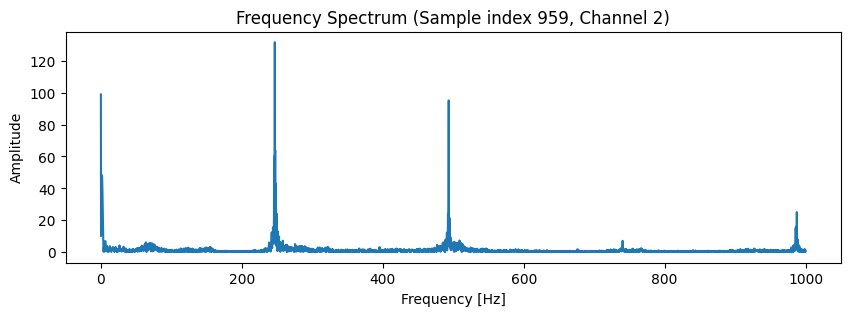

[0.  0.2 0.4 0.6 0.8] (5000,)


In [108]:
import numpy as np
import matplotlib.pyplot as plt
import random

feature_idx = 2  # 你可以選擇不同的通道索引
good_or_bad = "bad"
# good_or_bad = "bad"
print(good_or_bad)
if good_or_bad == "good":
    random_index = random.choice(good_indices)
else:
    random_index = random.choice(bad_indices)
print("index:", random_index)
_data = X_data1[random_index][:, feature_idx]
# 計算傅立葉變換
n = len(_data)
frequencies = np.fft.fftfreq(n, d=1/2000)  # 假設采樣頻率為 2000 Hz，這裡 d 是每個樣本的時間間隔
fft_result = np.fft.fft(_data)
# 計算振幅 (Magnitude)
amplitude = np.abs(fft_result)
# 只顯示正頻率部分 (頻譜是對稱的)
positive_freqs = frequencies[:n//2]
positive_amplitude = amplitude[:n//2]
# 可視化頻譜
plt.figure(figsize=(10, 3)) 
# plt.plot(frequencies, amplitude)
plt.plot(positive_freqs, positive_amplitude)
plt.title(f"Frequency Spectrum (Sample index {random_index}, Channel {feature_idx})")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
# plt.ylim(0, 150)
plt.show()
print(positive_freqs[:5], positive_amplitude.shape)

## 取 z-axis time domain

In [109]:
len(X_data1)

1702

In [110]:
X_good = X_data1[good_indices][:,:,-1]
X_good.shape

(1632, 10000)

In [111]:
X_bad = X_data1[bad_indices][:,:,-1]
X_bad.shape

(70, 10000)

In [112]:
SEED = 42

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

# 劃分正常資料為訓練集與測試集
X_good_train, X_good_test = train_test_split(X_good, test_size= len(X_bad) / len(X_good) * 2, random_state=SEED)

In [114]:
len(X_good_test), len(X_bad)

(140, 70)

In [115]:
X_good_train.shape

(1492, 10000)

In [116]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

tf.random.set_seed(SEED) 
np.random.seed(SEED)

# AutoEncoder 模型
input_dim = X_good_train.shape[1]
encoding_dim = 128

autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(encoding_dim, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               5120512   
                                                                 
 dense_11 (Dense)            (None, 128)               65664     
                                                                 
 dense_12 (Dense)            (None, 512)               66048     
                                                                 
 dense_13 (Dense)            (None, 10000)             5130000   
                                                                 
Total params: 10,382,224
Trainable params: 10,382,224
Non-trainable params: 0
_________________________________________________________________


In [117]:
# 計算重建誤差 (MSE) 作為異常分數
def calculate_reconstruction_error(model, data):
    reconstructed = model.predict(data)
    print(data.shape)
    # print(reconstructed.shape)
    mse = np.mean(np.square(data - reconstructed), axis=1)
    return mse

47/47 [==============================] - 0s 1ms/step
(1492, 10000)
5/5 [==============================] - 0s 2ms/step
(140, 10000)
3/3 [==============================] - 0s 2ms/step
(70, 10000)


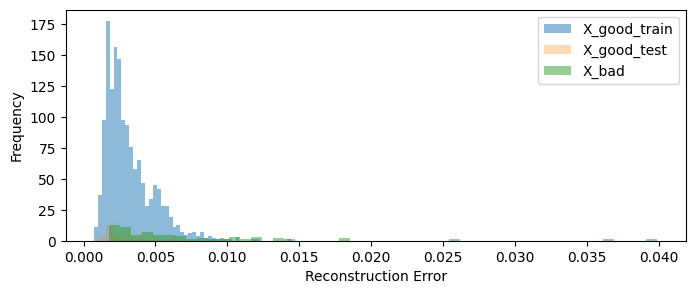

In [118]:
import matplotlib.pyplot as plt

mse_good_train = calculate_reconstruction_error(autoencoder, X_good_train)
mse_good_test = calculate_reconstruction_error(autoencoder, X_good_test)
mse_bad = calculate_reconstruction_error(autoencoder, X_bad)

plt.figure(figsize=(8, 3))
plt.hist(mse_good_train, bins=50, alpha=0.5, label='X_good_train')
plt.hist(mse_good_test, bins=50, alpha=0.3, label='X_good_test')
plt.hist(mse_bad, bins=50, alpha=0.5, label='X_bad')
plt.legend()
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

In [119]:
autoencoder(X_bad)

<tf.Tensor: shape=(70, 10000), dtype=float32, numpy=
array([[-0.03417673,  0.02430722, -0.02228245, ...,  0.01390522,
        -0.00572517, -0.01253295],
       [-0.0072492 , -0.00745795,  0.00296911, ...,  0.00855359,
        -0.01027842, -0.01045881],
       [ 0.00333601, -0.00175652, -0.0020836 , ...,  0.00215017,
        -0.01151031, -0.00271314],
       ...,
       [-0.01145688,  0.00609782, -0.0178099 , ...,  0.0113832 ,
        -0.03014558, -0.01105338],
       [-0.01108236, -0.00705455, -0.01714862, ..., -0.00816767,
        -0.04651237, -0.00054811],
       [-0.01522757, -0.01868913, -0.00748442, ..., -0.00966567,
        -0.03711643,  0.00674855]], dtype=float32)>

47/47 [==============================] - 0s 1ms/step
(1492, 10000)
5/5 [==============================] - 0s 2ms/step
(140, 10000)


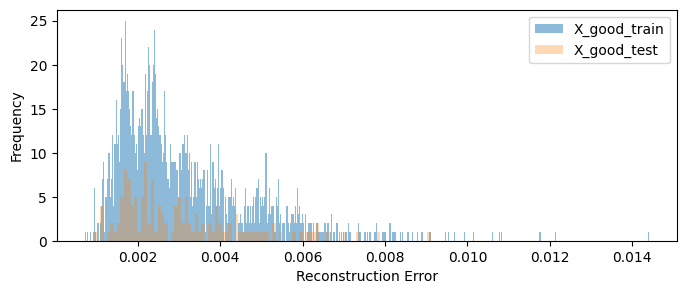

In [120]:
import matplotlib.pyplot as plt

mse_good_train = calculate_reconstruction_error(autoencoder, X_good_train)
mse_good_test = calculate_reconstruction_error(autoencoder, X_good_test)
# mse_bad = calculate_reconstruction_error(autoencoder, X_bad)

plt.figure(figsize=(8, 3))
plt.hist(mse_good_train, bins=500, alpha=0.5, label='X_good_train')
plt.hist(mse_good_test, bins=100, alpha=0.3, label='X_good_test')
# plt.hist(mse_bad, bins=500, alpha=0.5, label='X_bad')
plt.legend()
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

5/5 [==============================] - 0s 2ms/step
(140, 10000)
3/3 [==============================] - 0s 2ms/step
(70, 10000)


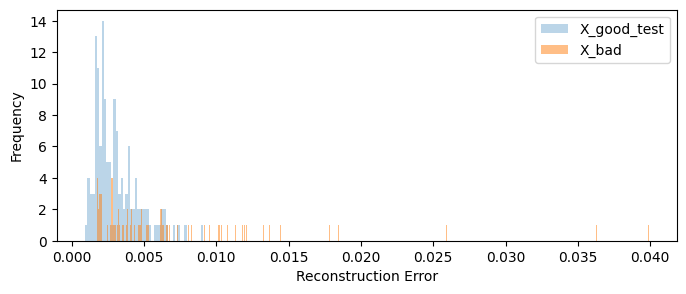

In [121]:
import matplotlib.pyplot as plt

# mse_good_train = calculate_reconstruction_error(autoencoder, X_good_train)
mse_good_test = calculate_reconstruction_error(autoencoder, X_good_test)
mse_bad = calculate_reconstruction_error(autoencoder, X_bad)

plt.figure(figsize=(8, 3))
# plt.hist(mse_good_train, bins=50, alpha=0.5, label='X_good_train')
plt.hist(mse_good_test, bins=50, alpha=0.3, label='X_good_test')
plt.hist(mse_bad, bins=500, alpha=0.5, label='X_bad')
plt.legend()
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

## Before training

47/47 [==============================] - 0s 2ms/step
(1492, 10000)
5/5 [==============================] - 0s 2ms/step
(140, 10000)
3/3 [==============================] - 0s 2ms/step
(70, 10000)


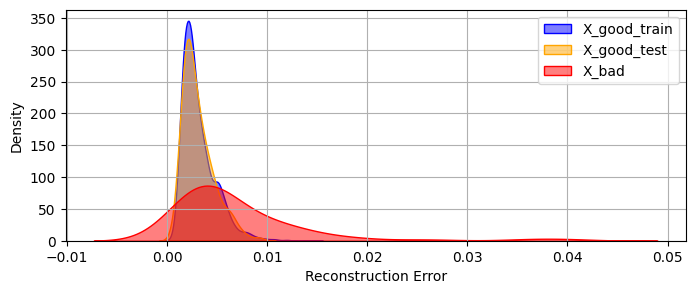

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# 計算重建誤差
mse_good_train = calculate_reconstruction_error(autoencoder, X_good_train)
mse_good_test = calculate_reconstruction_error(autoencoder, X_good_test)
mse_bad = calculate_reconstruction_error(autoencoder, X_bad)

# 只顯示 KDE 曲線
plt.figure(figsize=(8, 3))
sns.kdeplot(mse_good_train, color="blue", label='X_good_train', fill=True, alpha=0.5)
sns.kdeplot(mse_good_test, color="orange", label='X_good_test', fill=True, alpha=0.5)
sns.kdeplot(mse_bad, color="red", label='X_bad', fill=True, alpha=0.5)

# 圖表標籤與顯示
plt.xlabel('Reconstruction Error')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

In [123]:
len(X_good_test), len(X_bad)

(140, 70)

7/7 [==============================] - 0s 2ms/step
(210, 10000)
AUC: 0.7411


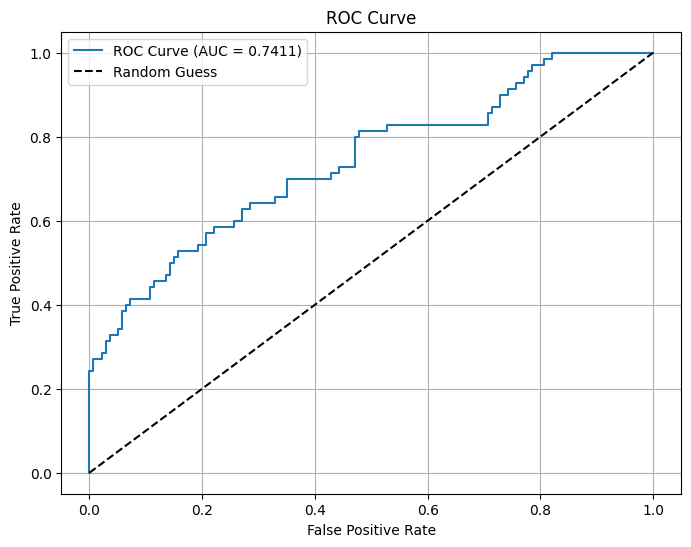

Optimal Threshold: 0.0046


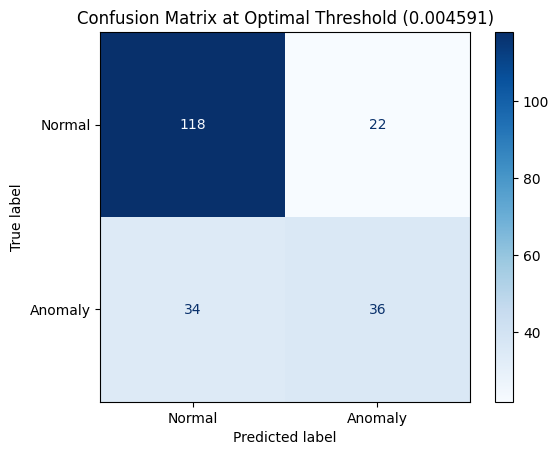

TPR (True Positive Rate): 0.5143
FPR (False Positive Rate): 0.1571
Precision: 0.6207
Recall: 0.5143


In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 假設你已經有 X_good_test 和 X_bad
X_test = np.concatenate([X_good_test, X_bad])  # 組合測試集
X_test_labels = np.concatenate([np.zeros(len(X_good_test)), np.ones(len(X_bad))])  # 標註正常和異常資料

# 計算重建誤差
re_error_X_test = calculate_reconstruction_error(autoencoder, X_test)

# 計算 ROC 曲線的 FPR, TPR 和閾值
fpr, tpr, thresholds = roc_curve(X_test_labels, re_error_X_test)

# 計算 AUC
auc = roc_auc_score(X_test_labels, re_error_X_test)
print(f"AUC: {auc:.4f}")

# 繪製 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.title("ROC Curve")
plt.show()

# 找到最佳閾值，通常是 ROC 曲線中最靠近 (0, 1) 點的閾值
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.4f}")

# 使用最佳閾值將異常分數轉換為二元分類結果
predictions = (re_error_X_test > optimal_threshold).astype(int)

# 計算混淆矩陣
cm = confusion_matrix(X_test_labels, predictions)

# 可視化混淆矩陣
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix at Optimal Threshold ({optimal_threshold:.6f})")
plt.show()

# # 打印混淆矩陣數值
# print("Confusion Matrix:")
# print(cm)

# 取得混淆矩陣中的各項數值
TN, FP, FN, TP = cm.ravel()

# 計算 TPR、FPR、Precision 和 Recall
TPR = TP / (TP + FN)  # True Positive Rate
FPR = FP / (FP + TN)  # False Positive Rate
Precision = TP / (TP + FP)  # Precision
Recall = TP / (TP + FN)  # Recall

# 打印指標
print(f"TPR (True Positive Rate): {TPR:.4f}")
print(f"FPR (False Positive Rate): {FPR:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")

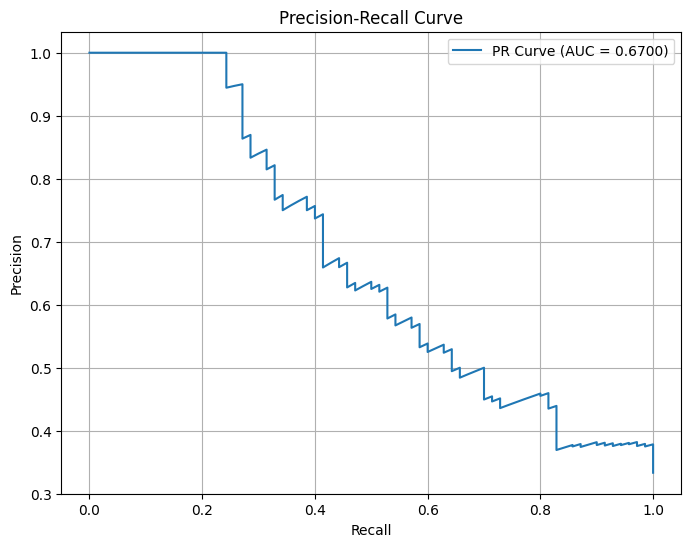

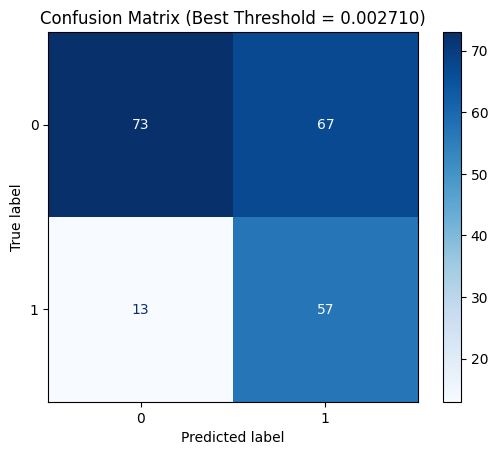

TPR (True Positive Rate): 0.8143
FPR (False Positive Rate): 0.4786
Precision: 0.4597
Recall: 0.8143


In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# 假設你已經有 X_test_labels 和 re_error_X_test
precision, recall, thresholds = precision_recall_curve(X_test_labels, re_error_X_test)

# 計算 AUC (Precision-Recall AUC)
pr_auc = auc(recall, precision)

# 繪製 Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.title("Precision-Recall Curve")
plt.show()

# 計算 F1 score
f1_scores = 2 * (precision * recall) / (precision + recall)

# 找到最佳閾值 (最佳 F1 score 對應的閾值)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

# 使用最佳閾值來計算預測類別
y_pred = (re_error_X_test >= best_threshold).astype(int)

# 計算混淆矩陣
cm = confusion_matrix(X_test_labels, y_pred)

# 可視化混淆矩陣
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Best Threshold = {best_threshold:.6f})")
plt.show()

# # 打印混淆矩陣數值
# print(f"Confusion Matrix at Best Threshold ({best_threshold:.2f}):")
# print(cm)

# 取得混淆矩陣中的各項數值
TN, FP, FN, TP = cm.ravel()

# 計算 TPR、FPR、Precision 和 Recall
TPR = TP / (TP + FN)  # True Positive Rate
FPR = FP / (FP + TN)  # False Positive Rate
Precision = TP / (TP + FP)  # Precision
Recall = TP / (TP + FN)  # Recall

# 打印指標
print(f"TPR (True Positive Rate): {TPR:.4f}")
print(f"FPR (False Positive Rate): {FPR:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")

## Training 1

In [126]:
from tensorflow.keras.callbacks import EarlyStopping

# 定義 Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',  # 監控的指標（可以是 'val_loss', 'loss', 或其他 metric）
    patience=5,          # 容忍幾個 epoch 無改善
    verbose=1,           # 是否顯示早停的訊息
    restore_best_weights=True  # 是否恢復為最佳權重
)

In [127]:
# 訓練 AutoEncoder (僅使用正常資料)
# history = autoencoder.fit(X_good, X_good, epochs=300, batch_size=32, shuffle=True, validation_split=0.2)
# 加入 Early Stopping 回調並訓練模型
history = autoencoder.fit(
    X_good_train, 
    X_good_train, 
    epochs=50, 
    batch_size=16, 
    shuffle=True, 
    validation_split=0.2, 
    callbacks=[early_stop]  # 加入 Early Stopping
)

Epoch 1/50
75/75 [==============================] - 2s 6ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 2/50
75/75 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 3/50
75/75 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 4/50
75/75 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 5/50
75/75 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 6/50
75/75 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 7/50
75/75 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 8/50
75/75 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 9/50
75/75 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 10/50
75/75 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 11/50
75/75 [

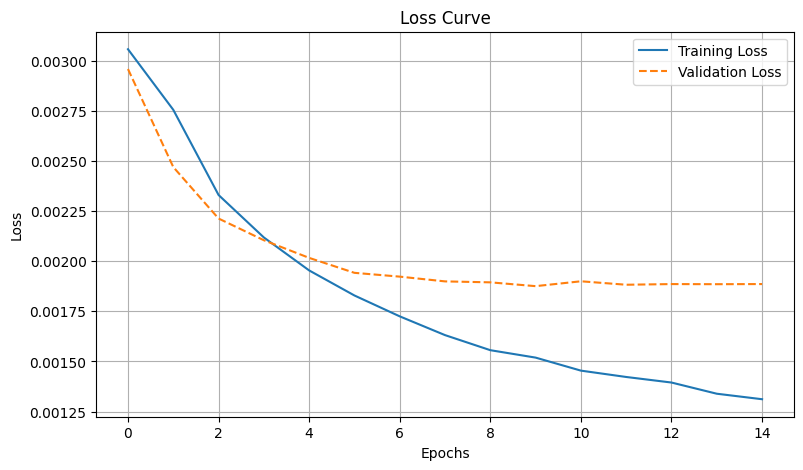

In [128]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']       # 訓練損失
val_loss = history.history['val_loss']    # 驗證損失

# 繪製訓練與驗證損失
plt.figure(figsize=(9, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

In [129]:
# 計算重建誤差 (MSE) 作為異常分數
def calculate_reconstruction_error(model, data):
    reconstructed = model.predict(data, verbose=0)
    print(data.shape)
    mse = np.mean(np.square(data - reconstructed), axis=1)
    return mse

(1492, 10000)
(140, 10000)
(70, 10000)


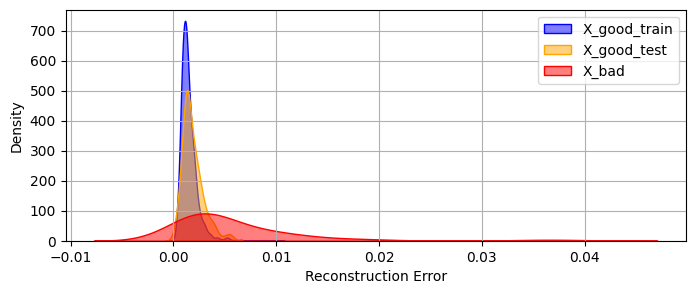

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# 計算重建誤差
mse_good_train = calculate_reconstruction_error(autoencoder, X_good_train)
mse_good_test = calculate_reconstruction_error(autoencoder, X_good_test)
mse_bad = calculate_reconstruction_error(autoencoder, X_bad)

# 只顯示 KDE 曲線
plt.figure(figsize=(8, 3))
sns.kdeplot(mse_good_train, color="blue", label='X_good_train', fill=True, alpha=0.5)
sns.kdeplot(mse_good_test, color="orange", label='X_good_test', fill=True, alpha=0.5)
sns.kdeplot(mse_bad, color="red", label='X_bad', fill=True, alpha=0.5)

# 圖表標籤與顯示
plt.xlabel('Reconstruction Error')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

In [131]:
len(X_good_test), len(X_bad)

(140, 70)

(210, 10000)
AUC: 0.8012


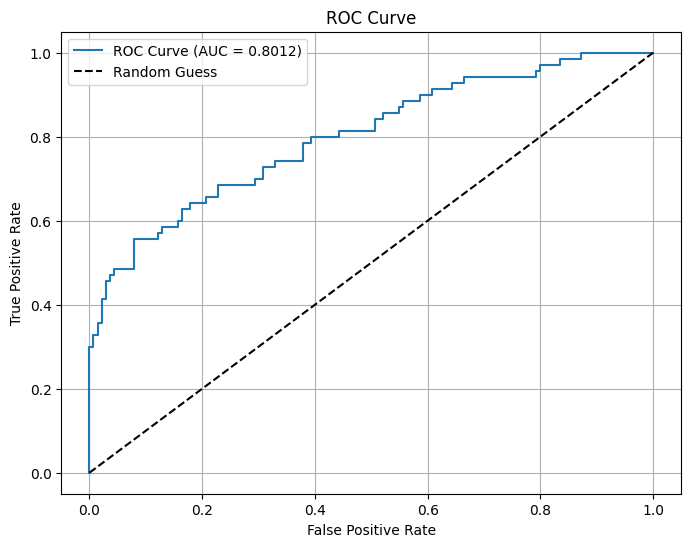

Optimal Threshold: 0.0034


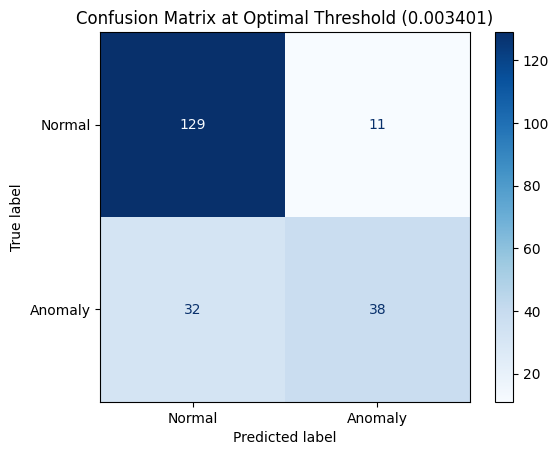

TPR (True Positive Rate): 0.5429
FPR (False Positive Rate): 0.0786
Precision: 0.7755
Recall: 0.5429


In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 假設你已經有 X_good_test 和 X_bad
X_test = np.concatenate([X_good_test, X_bad])  # 組合測試集
X_test_labels = np.concatenate([np.zeros(len(X_good_test)), np.ones(len(X_bad))])  # 標註正常和異常資料

# 計算重建誤差
re_error_X_test = calculate_reconstruction_error(autoencoder, X_test)

# 計算 ROC 曲線的 FPR, TPR 和閾值
fpr, tpr, thresholds = roc_curve(X_test_labels, re_error_X_test)

# 計算 AUC
auc = roc_auc_score(X_test_labels, re_error_X_test)
print(f"AUC: {auc:.4f}")

# 繪製 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.title("ROC Curve")
plt.show()

# 找到最佳閾值，通常是 ROC 曲線中最靠近 (0, 1) 點的閾值
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.4f}")

# 使用最佳閾值將異常分數轉換為二元分類結果
predictions = (re_error_X_test > optimal_threshold).astype(int)

# 計算混淆矩陣
cm = confusion_matrix(X_test_labels, predictions)

# 可視化混淆矩陣
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix at Optimal Threshold ({optimal_threshold:.6f})")
plt.show()

# # 打印混淆矩陣數值
# print("Confusion Matrix:")
# print(cm)
# 取得混淆矩陣中的各項數值
TN, FP, FN, TP = cm.ravel()

# 計算 TPR、FPR、Precision 和 Recall
TPR = TP / (TP + FN)  # True Positive Rate
FPR = FP / (FP + TN)  # False Positive Rate
Precision = TP / (TP + FP)  # Precision
Recall = TP / (TP + FN)  # Recall

# 打印指標
print(f"TPR (True Positive Rate): {TPR:.4f}")
print(f"FPR (False Positive Rate): {FPR:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")

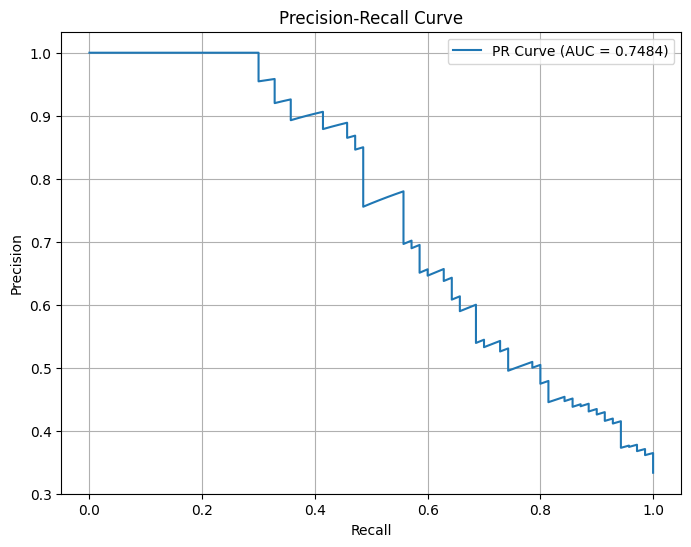

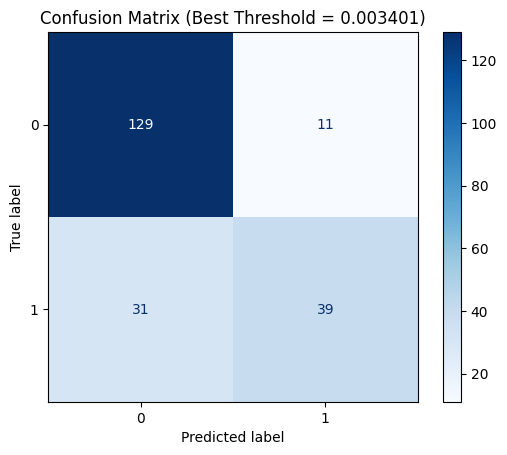

TPR (True Positive Rate): 0.5571
FPR (False Positive Rate): 0.0786
Precision: 0.7800
Recall: 0.5571


In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# 假設你已經有 X_test_labels 和 re_error_X_test
precision, recall, thresholds = precision_recall_curve(X_test_labels, re_error_X_test)

# 計算 AUC (Precision-Recall AUC)
pr_auc = auc(recall, precision)

# 繪製 Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.title("Precision-Recall Curve")
plt.show()

# 計算 F1 score
f1_scores = 2 * (precision * recall) / (precision + recall)

# 找到最佳閾值 (最佳 F1 score 對應的閾值)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

# 使用最佳閾值來計算預測類別
y_pred = (re_error_X_test >= best_threshold).astype(int)

# 計算混淆矩陣
cm = confusion_matrix(X_test_labels, y_pred)

# 可視化混淆矩陣
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Best Threshold = {best_threshold:.6f})")
plt.show()

# # 打印混淆矩陣數值
# print(f"Confusion Matrix at Best Threshold ({best_threshold:.2f}):")
# print(cm)
# 取得混淆矩陣中的各項數值
TN, FP, FN, TP = cm.ravel()

# 計算 TPR、FPR、Precision 和 Recall
TPR = TP / (TP + FN)  # True Positive Rate
FPR = FP / (FP + TN)  # False Positive Rate
Precision = TP / (TP + FP)  # Precision
Recall = TP / (TP + FN)  # Recall

# 打印指標
print(f"TPR (True Positive Rate): {TPR:.4f}")
print(f"FPR (False Positive Rate): {FPR:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")

## Training 2

In [134]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(SEED) 
np.random.seed(SEED)

# AutoEncoder 模型
input_dim = X_good_train.shape[1]
encoding_dim = 128

autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(encoding_dim, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

# 定義 Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',  # 監控的指標（可以是 'val_loss', 'loss', 或其他 metric）
    patience=10,          # 容忍幾個 epoch 無改善
    verbose=1,           # 是否顯示早停的訊息
    restore_best_weights=True  # 是否恢復為最佳權重
)

# 訓練 AutoEncoder (僅使用正常資料)
# history = autoencoder.fit(X_good, X_good, epochs=300, batch_size=32, shuffle=True, validation_split=0.2)
# 加入 Early Stopping 回調並訓練模型
history = autoencoder.fit(
    X_good_train, 
    X_good_train, 
    epochs=50, 
    batch_size=16, 
    shuffle=True, 
    validation_split=0.2, 
    callbacks=[early_stop]  # 加入 Early Stopping
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               5120512   
                                                                 
 dense_15 (Dense)            (None, 128)               65664     
                                                                 
 dense_16 (Dense)            (None, 512)               66048     
                                                                 
 dense_17 (Dense)            (None, 10000)             5130000   
                                                                 
Total params: 10,382,224
Trainable params: 10,382,224
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
75/75 [==============================] - 2s 6ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 2/50
75/75 [==============================] - 0s 4ms/step - loss: 0.00

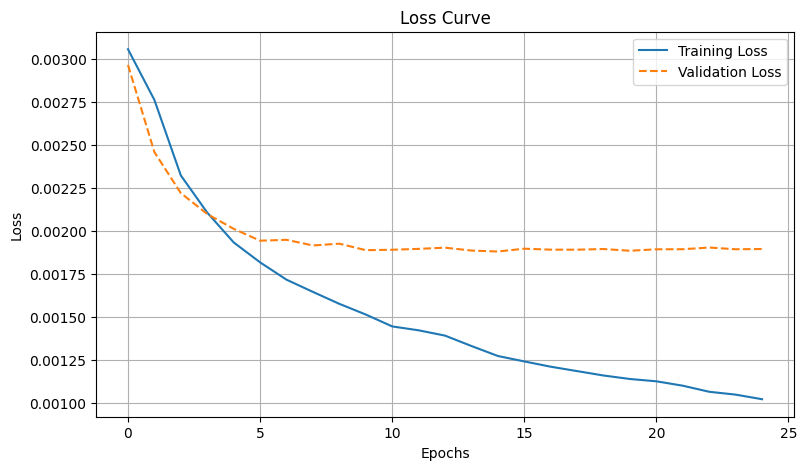

In [135]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']       # 訓練損失
val_loss = history.history['val_loss']    # 驗證損失

# 繪製訓練與驗證損失
plt.figure(figsize=(9, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

In [136]:
# 計算重建誤差 (MSE) 作為異常分數
def calculate_reconstruction_error(model, data):
    reconstructed = model.predict(data, verbose=0)
    print(data.shape)
    mse = np.mean(np.square(data - reconstructed), axis=1)
    return mse

(1492, 10000)
(140, 10000)
(70, 10000)


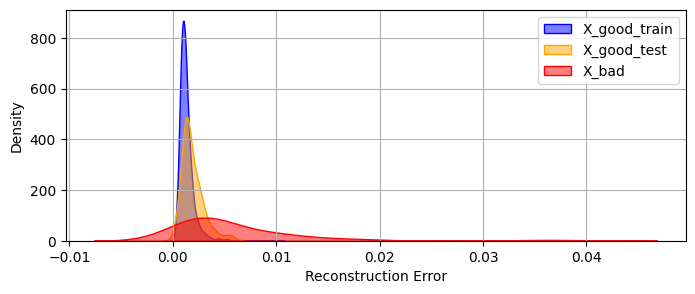

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# 計算重建誤差
mse_good_train = calculate_reconstruction_error(autoencoder, X_good_train)
mse_good_test = calculate_reconstruction_error(autoencoder, X_good_test)
mse_bad = calculate_reconstruction_error(autoencoder, X_bad)

# 只顯示 KDE 曲線
plt.figure(figsize=(8, 3))
sns.kdeplot(mse_good_train, color="blue", label='X_good_train', fill=True, alpha=0.5)
sns.kdeplot(mse_good_test, color="orange", label='X_good_test', fill=True, alpha=0.5)
sns.kdeplot(mse_bad, color="red", label='X_bad', fill=True, alpha=0.5)

# 圖表標籤與顯示
plt.xlabel('Reconstruction Error')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

In [138]:
len(X_good_test), len(X_bad)

(140, 70)

(210, 10000)
AUC: 0.8034


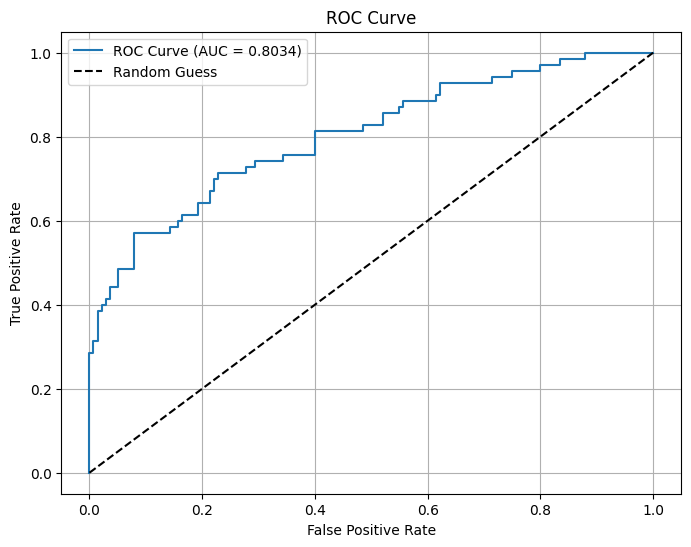

Optimal Threshold: 0.0034


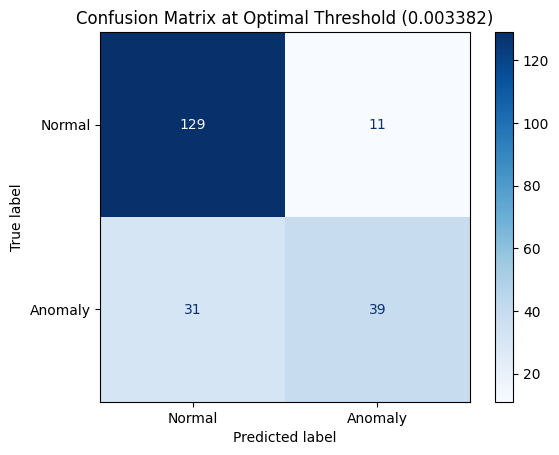

TPR (True Positive Rate): 0.5571
FPR (False Positive Rate): 0.0786
Precision: 0.7800
Recall: 0.5571


In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 假設你已經有 X_good_test 和 X_bad
X_test = np.concatenate([X_good_test, X_bad])  # 組合測試集
X_test_labels = np.concatenate([np.zeros(len(X_good_test)), np.ones(len(X_bad))])  # 標註正常和異常資料

# 計算重建誤差
re_error_X_test = calculate_reconstruction_error(autoencoder, X_test)

# 計算 ROC 曲線的 FPR, TPR 和閾值
fpr, tpr, thresholds = roc_curve(X_test_labels, re_error_X_test)

# 計算 AUC
auc = roc_auc_score(X_test_labels, re_error_X_test)
print(f"AUC: {auc:.4f}")

# 繪製 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.title("ROC Curve")
plt.show()

# 找到最佳閾值，通常是 ROC 曲線中最靠近 (0, 1) 點的閾值
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.4f}")

# 使用最佳閾值將異常分數轉換為二元分類結果
predictions = (re_error_X_test > optimal_threshold).astype(int)

# 計算混淆矩陣
cm = confusion_matrix(X_test_labels, predictions)

# 可視化混淆矩陣
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix at Optimal Threshold ({optimal_threshold:.6f})")
plt.show()

# # 打印混淆矩陣數值
# print("Confusion Matrix:")
# print(cm)
# 取得混淆矩陣中的各項數值
TN, FP, FN, TP = cm.ravel()

# 計算 TPR、FPR、Precision 和 Recall
TPR = TP / (TP + FN)  # True Positive Rate
FPR = FP / (FP + TN)  # False Positive Rate
Precision = TP / (TP + FP)  # Precision
Recall = TP / (TP + FN)  # Recall

# 打印指標
print(f"TPR (True Positive Rate): {TPR:.4f}")
print(f"FPR (False Positive Rate): {FPR:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")

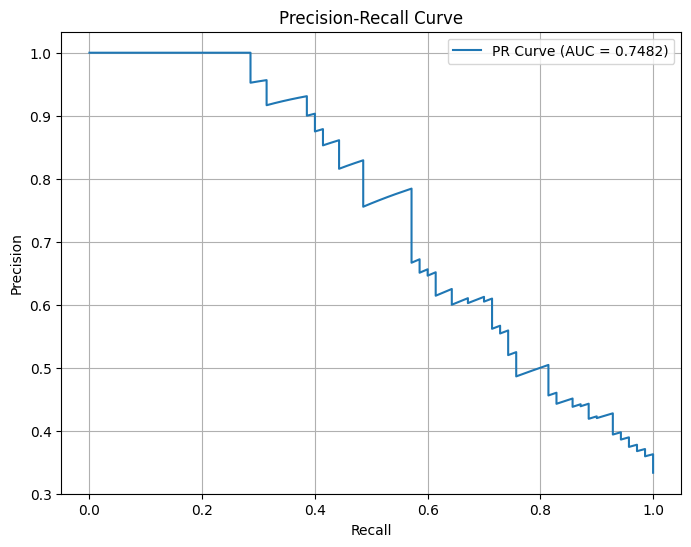

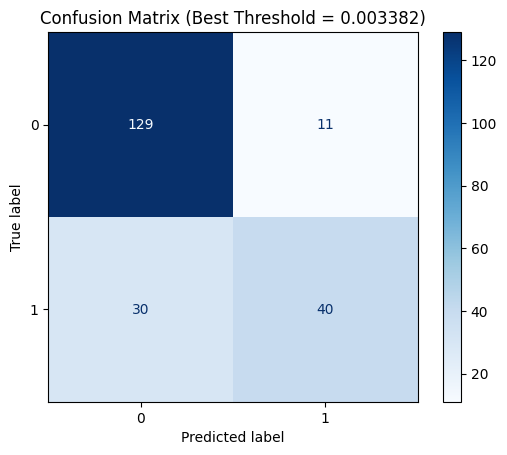

TPR (True Positive Rate): 0.5714
FPR (False Positive Rate): 0.0786
Precision: 0.7843
Recall: 0.5714


In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# 假設你已經有 X_test_labels 和 re_error_X_test
precision, recall, thresholds = precision_recall_curve(X_test_labels, re_error_X_test)

# 計算 AUC (Precision-Recall AUC)
pr_auc = auc(recall, precision)

# 繪製 Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.title("Precision-Recall Curve")
plt.show()

# 計算 F1 score
f1_scores = 2 * (precision * recall) / (precision + recall)

# 找到最佳閾值 (最佳 F1 score 對應的閾值)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

# 使用最佳閾值來計算預測類別
y_pred = (re_error_X_test >= best_threshold).astype(int)

# 計算混淆矩陣
cm = confusion_matrix(X_test_labels, y_pred)

# 可視化混淆矩陣
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Best Threshold = {best_threshold:.6f})")
plt.show()

# # 打印混淆矩陣數值
# print(f"Confusion Matrix at Best Threshold ({best_threshold:.2f}):")
# print(cm)
# 取得混淆矩陣中的各項數值
TN, FP, FN, TP = cm.ravel()

# 計算 TPR、FPR、Precision 和 Recall
TPR = TP / (TP + FN)  # True Positive Rate
FPR = FP / (FP + TN)  # False Positive Rate
Precision = TP / (TP + FP)  # Precision
Recall = TP / (TP + FN)  # Recall

# 打印指標
print(f"TPR (True Positive Rate): {TPR:.4f}")
print(f"FPR (False Positive Rate): {FPR:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")

(210, 10000)
AUC: 0.8034


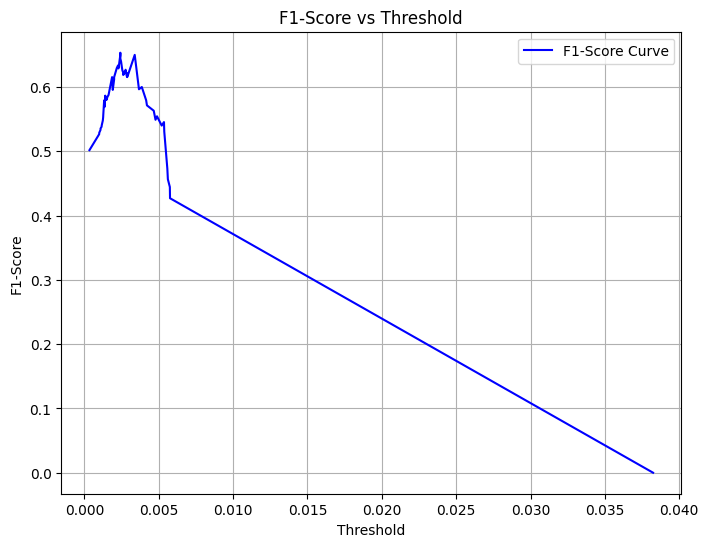

Best F1-Score: 0.6533 at Threshold: 0.0024


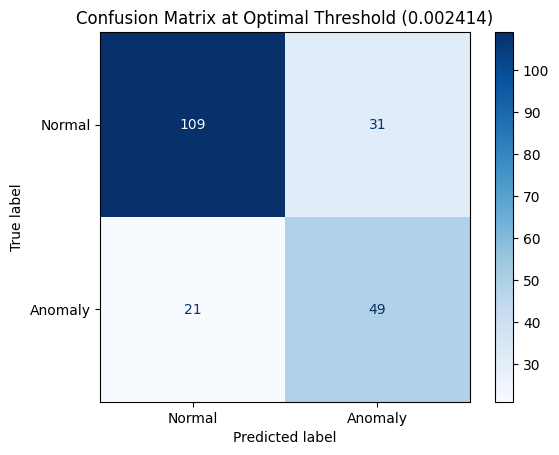

TPR (True Positive Rate): 0.7000
FPR (False Positive Rate): 0.2214
Precision: 0.6125
Recall: 0.7000
F1-Score (at Optimal Threshold): 0.6533


In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, f1_score

# 假設你已經有 X_good_test 和 X_bad
X_test = np.concatenate([X_good_test, X_bad])  # 組合測試集
X_test_labels = np.concatenate([np.zeros(len(X_good_test)), np.ones(len(X_bad))])  # 標註正常和異常資料

# 計算重建誤差
re_error_X_test = calculate_reconstruction_error(autoencoder, X_test)

# 計算 ROC 曲線的 FPR, TPR 和閾值
fpr, tpr, thresholds = roc_curve(X_test_labels, re_error_X_test)

# 計算 AUC
auc = roc_auc_score(X_test_labels, re_error_X_test)
print(f"AUC: {auc:.4f}")

# 計算每個閾值下的 F1 分數
f1_scores = []
for threshold in thresholds:
    predictions = (re_error_X_test > threshold).astype(int)
    f1 = f1_score(X_test_labels, predictions)
    f1_scores.append(f1)

# 繪製 F1-Score 曲線
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label="F1-Score Curve", color="blue")
plt.xlabel("Threshold")
plt.ylabel("F1-Score")
plt.title("F1-Score vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

# 找到最佳閾值
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
best_f1_score = f1_scores[optimal_idx]
print(f"Best F1-Score: {best_f1_score:.4f} at Threshold: {optimal_threshold:.4f}")

# 使用最佳閾值將異常分數轉換為二元分類結果
predictions = (re_error_X_test > optimal_threshold).astype(int)

# 計算混淆矩陣
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(X_test_labels, predictions)

# 可視化混淆矩陣
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix at Optimal Threshold ({optimal_threshold:.6f})")
plt.show()

# 取得混淆矩陣中的各項數值
TN, FP, FN, TP = cm.ravel()

# 計算 TPR、FPR、Precision、Recall 和 F1-Score
TPR = TP / (TP + FN)  # True Positive Rate
FPR = FP / (FP + TN)  # False Positive Rate
Precision = TP / (TP + FP)  # Precision
Recall = TP / (TP + FN)  # Recall
final_f1_score = 2 * (Precision * Recall) / (Precision + Recall)  # F1-Score

# 打印指標
print(f"TPR (True Positive Rate): {TPR:.4f}")
print(f"FPR (False Positive Rate): {FPR:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1-Score (at Optimal Threshold): {final_f1_score:.4f}")

## Final